In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import sys
%pip install census
%pip install us
from census import Census
from us import states


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
neighborhoods = gpd.read_file('shapefiles/Neighborhood Boundaries/geo_export_ef027b0d-4a68-4a7f-81a6-64cd0be38041.shp')
neighborhoods = neighborhoods.set_geometry("geometry")

In [4]:
# Set API key
c = Census("9e840ebf4aecf1dfee3001ca5b9df8a1c5c8e541")

In [6]:
tracts = gpd.read_file("shapefiles/cb_2020_44_tract_500k/cb_2020_44_tract_500k.shp")
tracts = tracts.to_crs(4269)

places = gpd.read_file('shapefiles/cb_2020_44_place_500k/cb_2020_44_place_500k.shp')
places = places.set_crs(4269)
providence = places.loc[places.PLACEFP == '59000']

providence.to_file("providence.shp")

In [7]:
data_dict = {'B08133_001E':'Estimate!!Aggregate travel time to work (in minutes) AGGREGATE TRAVEL TIME TO WORK (IN MINUTES) OF WORKERS BY TIME OF DEPARTURE TO GO TO WORK', 
            'B08133_007E' : 'Estimate!!Aggregate travel time to work (in minutes):!!7:00 a.m. to 7:29 a.m. AGGREGATE TRAVEL TIME TO WORK (IN MINUTES) OF WORKERS BY TIME OF DEPARTURE TO GO TO WORK',
            'B08133_008E' : 'Estimate!!Aggregate travel time to work (in minutes):!!7:30 a.m. to 7:59 a.m. AGGREGATE TRAVEL TIME TO WORK (IN MINUTES) OF WORKERS BY TIME OF DEPARTURE TO GO TO WORK',
            'B08133_009E' : 'Estimate!!Aggregate travel time to work (in minutes):!!8:00 a.m. to 8:29 a.m. AGGREGATE TRAVEL TIME TO WORK (IN MINUTES) OF WORKERS BY TIME OF DEPARTURE TO GO TO WORK',
            'B08133_010E' : 'Estimate!!Aggregate travel time to work (in minutes):!!8:30 a.m. to 8:59 a.m. AGGREGATE TRAVEL TIME TO WORK (IN MINUTES) OF WORKERS BY TIME OF DEPARTURE TO GO TO WORK',
            'B08133_011E' : 'Estimate!!Aggregate travel time to work (in minutes):!!9:00 a.m. to 9:59 a.m. AGGREGATE TRAVEL TIME TO WORK (IN MINUTES) OF WORKERS BY TIME OF DEPARTURE TO GO TO WORK',
            'B08133_012E' : 'Estimate!!Aggregate travel time to work (in minutes):!!10:00 a.m. to 10:59 a.m. AGGREGATE TRAVEL TIME TO WORK (IN MINUTES) OF WORKERS BY TIME OF DEPARTURE TO GO TO WORK',
            'B08133_013E' : 'Estimate!!Aggregate travel time to work (in minutes):!!11:00 a.m. to 11:59 a.m.	AGGREGATE TRAVEL TIME TO WORK (IN MINUTES) OF WORKERS BY TIME OF DEPARTURE TO GO TO WORK',
            'B08011_001E' : 'Estimate!!Total SEX OF WORKERS BY TIME OF DEPARTURE TO GO TO WORK',
            'B08011_007E' : 'Estimate!!Total:!!7:00 a.m. to 7:29 a.m. SEX OF WORKERS BY TIME OF DEPARTURE TO GO TO WORK',
            'B08011_008E' : 'Estimate!!Total:!!7:30 a.m. to 7:59 a.m. SEX OF WORKERS BY TIME OF DEPARTURE TO GO TO WORK',
            'B08011_009E' : 'Estimate!!Total:!!8:00 a.m. to 8:29 a.m. SEX OF WORKERS BY TIME OF DEPARTURE TO GO TO WORK',
            'B08011_010E' : 'Estimate!!Total:!!8:30 a.m. to 8:59 a.m. SEX OF WORKERS BY TIME OF DEPARTURE TO GO TO WORK',
            'B08011_011E' : 'Estimate!!Total:!!9:00 a.m. to 9:59 a.m. SEX OF WORKERS BY TIME OF DEPARTURE TO GO TO WORK',
            'B08011_012E' : 'Estimate!!Total:!!10:00 a.m. to 10:59 a.m. SEX OF WORKERS BY TIME OF DEPARTURE TO GO TO WORK',
            'B08011_013E' : 'Estimate!!Total:!!11:00 a.m. to 11:59 a.m.	SEX OF WORKERS BY TIME OF DEPARTURE TO GO TO WORK',
            
            'B08201_001E':	'Estimate!!Total:HOUSEHOLD SIZE BY VEHICLES AVAILABLE',
            'B08201_002E':	'Estimate!!Total:!!No vehicle available	HOUSEHOLD SIZE BY VEHICLES AVAILABLE',
            'B08201_003E':	'Estimate!!Total:!!1 vehicle available	HOUSEHOLD SIZE BY VEHICLES AVAILABLE',
            'B08201_004E':	'Estimate!!Total:!!2 vehicles available	HOUSEHOLD SIZE BY VEHICLES AVAILABLE',
            'B08201_005E':	'Estimate!!Total:!!3 vehicles available	HOUSEHOLD SIZE BY VEHICLES AVAILABLE',
            'B08201_006E':	'Estimate!!Total:!!4 or more vehicles available	HOUSEHOLD SIZE BY VEHICLES AVAILABLE',

            "avg_time_agg" : "B08133_001E/B08011_001E",
            "avg_time_to_work_7_8am" : "(B08133_007E + B08133_008E)/(B08011_007E+ B08011_008E)",
            "avg_time_to_work_8_9am": "(B08133_009E + B08133_010E)/(B08011_009E+ B08011_010E)",
            "avg_time_to_work_9_10am" : "(B08133_011E + B08133_012E)/(B08011_011E+ B08011_012E)"}

data_dict = pd.Series(data_dict, name = "Definition")
data_dict.index.name = "col_name"
data_dict = data_dict.reset_index()

In [1]:
# https://api.census.gov/data/2019/acs/acs5/variables.html
# B08011_007E	Estimate!!Total:!!7:00 a.m. to 7:29 a.m.	SEX OF WORKERS BY TIME OF DEPARTURE TO GO TO WORK	not required	B08011_007EA, B08011_007M, B08011_007MA	0	int	B08011
# B08133_007E	Estimate!!Aggregate travel time to work (in minutes):!!7:00 a.m. to 7:29 a.m.	AGGREGATE TRAVEL TIME TO WORK (IN MINUTES) OF WORKERS BY TIME OF DEPARTURE TO GO TO WORK	not required	B08133_007EA, B08133_007M, B08133_007MA	0	int	B08133

departure_times_2015 = c.acs5.state_county_tract(fields = ('NAME',"B08133_001E","B08011_001E","B08011_007E", 'B08133_007E',"B08011_008E", 
                                        'B08133_008E',"B08011_009E", 'B08133_009E',"B08011_010E", 'B08133_010E',"B08011_011E", 'B08133_011E',
                                        "B08011_012E", 'B08133_012E',"B08011_013E", 'B08133_013E','B08201_001E','B08201_002E','B08201_003E',
                                        'B08201_004E','B08201_005E','B08201_006E','B19013_001E'),
                                      state_fips = states.RI.fips,
                                      county_fips = "007",
                                      tract = "*",
                                      year = 2015)

departure_times_2015_df = pd.DataFrame(departure_times_2015)

departure_times_2015_df['avg_time_agg'] = departure_times_2015_df.B08133_001E/departure_times_2015_df.B08011_001E

departure_times_2015_df['avg_time_to_work_7_8am'] = (departure_times_2015_df.B08133_007E + departure_times_2015_df.B08133_008E)/(departure_times_2015_df.B08011_007E+ departure_times_2015_df.B08011_008E)

departure_times_2015_df['avg_time_to_work_8_9am'] = (departure_times_2015_df.B08133_009E + departure_times_2015_df.B08133_010E)/(departure_times_2015_df.B08011_009E+ departure_times_2015_df.B08011_010E)

departure_times_2015_df['avg_time_to_work_9_10am'] = (departure_times_2015_df.B08133_011E + departure_times_2015_df.B08133_012E)/(departure_times_2015_df.B08011_011E+ departure_times_2015_df.B08011_012E)

departure_times_2015_df['year'] = 2015

# departure_times_2015_df["GEOID"] = departure_times_2015_df['state'] + departure_times_2015_df["county"] + departure_times_2015_df['tract']

# departure_times_2015_gdf = tracts.merge(departure_times_2015_df, on = 'GEOID')

NameError: name 'c' is not defined

In [9]:
departure_times_2019 = c.acs5.state_county_tract(fields = ('NAME', "B08133_001E","B08011_001E","B08011_007E", 'B08133_007E',"B08011_008E", 'B08133_008E',"B08011_009E", 'B08133_009E',"B08011_010E", 'B08133_010E',"B08011_011E", 'B08133_011E',"B08011_012E", 'B08133_012E',"B08011_013E", 'B08133_013E','B19013_001E'),
                                      state_fips = states.RI.fips,
                                      county_fips = "007",
                                      tract = "*",
                                      year = 2019)

departure_times_2019_df = pd.DataFrame(departure_times_2019)

departure_times_2019_df['avg_time_agg'] = departure_times_2019_df.B08133_001E/departure_times_2019_df.B08011_001E

departure_times_2019_df['avg_time_to_work_7_8am'] = (departure_times_2019_df.B08133_007E + departure_times_2019_df.B08133_008E)/(departure_times_2019_df.B08011_007E+ departure_times_2019_df.B08011_008E)

departure_times_2019_df['avg_time_to_work_8_9am'] = (departure_times_2019_df.B08133_009E + departure_times_2019_df.B08133_010E)/(departure_times_2019_df.B08011_009E+ departure_times_2019_df.B08011_010E)

departure_times_2019_df['avg_time_to_work_9_10am'] = (departure_times_2019_df.B08133_011E + departure_times_2019_df.B08133_012E)/(departure_times_2019_df.B08011_011E+ departure_times_2019_df.B08011_012E)

departure_times_2019_df['year'] = 2019

# departure_times_2019_df["GEOID"] = departure_times_2019_df['state'] + departure_times_2019_df["county"] + departure_times_2019_df['tract']

# departure_times_2019_gdf = tracts.merge(departure_times_2019_df, on = 'GEOID')

In [10]:
with pd.ExcelWriter('travel_times_by_departure_time_tracts.xlsx') as writer:
    data_dict.to_excel(writer, sheet_name="Data Dictionary")
    departure_times_2015_df.to_excel(writer, sheet_name="ACS_2015")
    departure_times_2019_df.to_excel(writer, sheet_name="ACS_2019")


In [14]:
departure_times_2015_df = departure_times_2015_df.rename(columns={'tract':'TRACTCE'})

In [16]:
departure_times_2015_df

,NAME,B08133_001E,B08011_001E,B08011_007E,B08133_007E,B08011_008E,B08133_008E,B08011_009E,B08133_009E,B08011_010E,...,B08201_005E,B08201_006E,state,county,TRACTCE,avg_time_agg,avg_time_to_work_7_8am,avg_time_to_work_8_9am,avg_time_to_work_9_10am,year
0,"Census Tract 145.01, Providence County, Rhode ...",NaN,2638.0,319.0,NaN,441.0,NaN,457.0,NaN,192.0,...,397.0,213.0,44,007,014501,NaN,NaN,NaN,NaN,2015
1,"Census Tract 155, Providence County, Rhode Island",NaN,1876.0,131.0,NaN,329.0,NaN,214.0,NaN,64.0,...,196.0,24.0,44,007,015500,NaN,NaN,NaN,NaN,2015
2,"Census Tract 159, Providence County, Rhode Island",NaN,1662.0,121.0,NaN,279.0,NaN,73.0,NaN,91.0,...,143.0,64.0,44,007,015900,NaN,NaN,NaN,NaN,2015
3,"Census Tract 2, Providence County, Rhode Island",NaN,2195.0,356.0,NaN,34.0,NaN,308.0,NaN,95.0,...,49.0,0.0,44,007,000200,NaN,NaN,NaN,NaN,2015
4,"Census Tract 3, Providence County, Rhode Island",NaN,2696.0,213.0,NaN,454.0,NaN,392.0,NaN,207.0,...,166.0,18.0,44,007,000300,NaN,NaN,NaN,NaN,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,"Census Tract 132.02, Providence County, Rhode ...",100925.0,3244.0,694.0,23115.0,353.0,10190.0,683.0,22185.0,63.0,...,555.0,282.0,44,007,013202,31.111282,31.809933,31.025469,24.012097,2015
137,"Census Tract 137.01, Providence County, Rhode ...",NaN,1748.0,310.0,NaN,283.0,NaN,131.0,NaN,95.0,...,144.0,85.0,44,007,013701,NaN,NaN,NaN,NaN,2015
138,"Census Tract 138, Providence County, Rhode Island",NaN,2516.0,366.0,NaN,428.0,NaN,303.0,NaN,192.0,...,225.0,48.0,44,007,013800,NaN,NaN,NaN,NaN,2015
139,"Census Tract 171, Providence County, Rhode Island",NaN,2067.0,277.0,NaN,267.0,NaN,339.0,NaN,119.0,...,176.0,69.0,44,007,017100,NaN,NaN,NaN,NaN,2015


In [15]:
departure_times_2015_gdf = tracts.merge(departure_times_2015_df, on = 'TRACTCE')
departure_times_2015_gdf

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME_x,NAMELSAD,STUSPS,NAMELSADCO,STATE_NAME,...,B08201_004E,B08201_005E,B08201_006E,state,county,avg_time_agg,avg_time_to_work_7_8am,avg_time_to_work_8_9am,avg_time_to_work_9_10am,year
0,44,007,014200,1400000US44007014200,44007014200,142,Census Tract 142,RI,Providence County,Rhode Island,...,440.0,98.0,37.0,44,007,NaN,NaN,NaN,NaN,2015
1,44,007,011200,1400000US44007011200,44007011200,112,Census Tract 112,RI,Providence County,Rhode Island,...,868.0,252.0,71.0,44,007,NaN,NaN,NaN,NaN,2015
2,44,007,016400,1400000US44007016400,44007016400,164,Census Tract 164,RI,Providence County,Rhode Island,...,395.0,123.0,40.0,44,007,NaN,NaN,NaN,NaN,2015
3,44,007,003300,1400000US44007003300,44007003300,33,Census Tract 33,RI,Providence County,Rhode Island,...,740.0,75.0,14.0,44,007,NaN,NaN,NaN,NaN,2015
4,44,007,015400,1400000US44007015400,44007015400,154,Census Tract 154,RI,Providence County,Rhode Island,...,264.0,94.0,19.0,44,007,NaN,NaN,NaN,NaN,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,44,007,012802,1400000US44007012802,44007012802,128.02,Census Tract 128.02,RI,Providence County,Rhode Island,...,376.0,160.0,53.0,44,007,NaN,NaN,NaN,NaN,2015
133,44,007,015900,1400000US44007015900,44007015900,159,Census Tract 159,RI,Providence County,Rhode Island,...,442.0,143.0,64.0,44,007,NaN,NaN,NaN,NaN,2015
134,44,007,011901,1400000US44007011901,44007011901,119.01,Census Tract 119.01,RI,Providence County,Rhode Island,...,552.0,125.0,75.0,44,007,NaN,NaN,NaN,NaN,2015
135,44,007,002400,1400000US44007002400,44007002400,24,Census Tract 24,RI,Providence County,Rhode Island,...,844.0,242.0,39.0,44,007,17.651810,22.477134,13.528628,18.342441,2015


<AxesSubplot:>

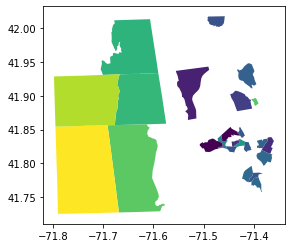

In [17]:
departure_times_2015_gdf.plot("avg_time_agg")